In [7]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling


In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/Breast_Cancer_data.csv')

In [26]:
data.shape

(569, 31)

In [5]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.drop(data.columns[[-1,0]],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
diagosis_all=list(data.shape)[0]
diagosis_categories=list(data['diagnosis'].value_counts())
print("\n \t The data has {} diagnosis, {} malignant and {} bengin.".format(diagosis_all,
                                                                            diagosis_categories[0],
                                                                            diagosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 bengin.


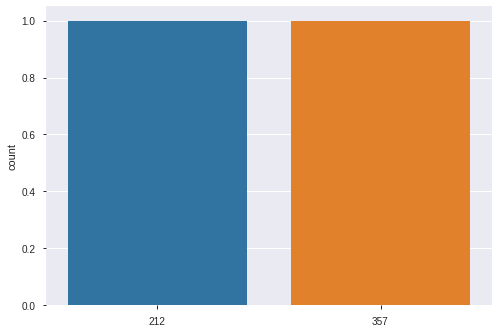

In [13]:
sns.countplot(diagosis_categories)

In [14]:
features_mean=list(data.columns[1:11])
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

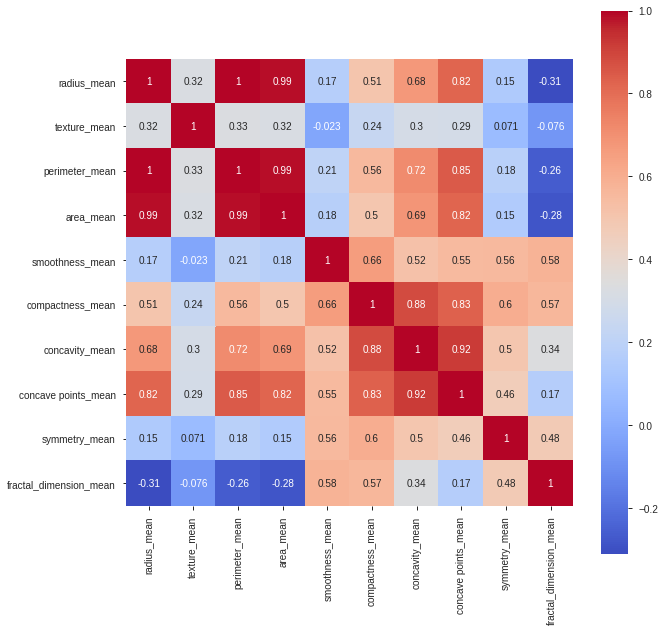

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

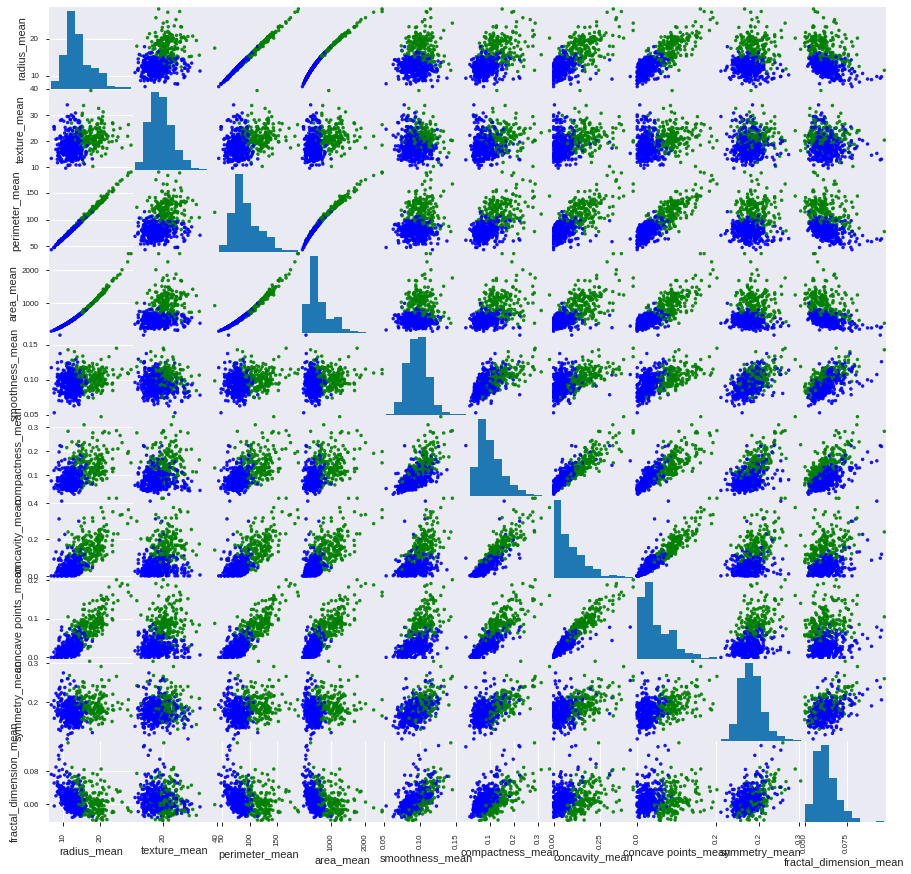

In [16]:
from pandas.plotting import scatter_matrix

color_dic={'M':'Green','B':'Blue'}
colors=data['diagnosis'].map(lambda x: color_dic.get(x))

scatter_matrix(data[features_mean],c=colors,alpha=0.9,figsize=((15,15)));

plt.show()

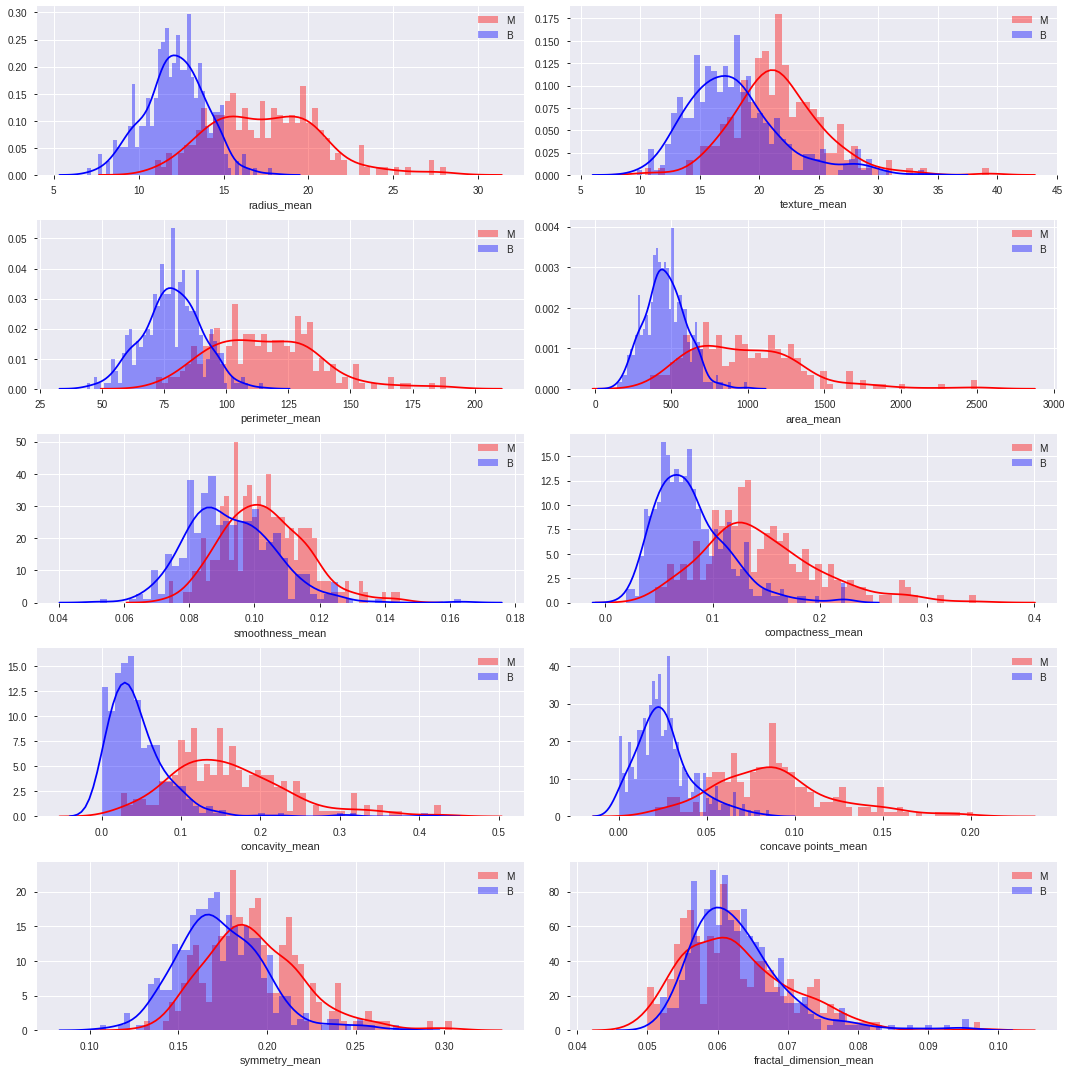

In [21]:
bins=50
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows=int(len(features_mean)/2)
    plt.subplot(rows,2,i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature],bins=bins,color='red',label='M')
    
    sns.distplot(data[data['diagnosis']=='B'][feature],bins=bins,color='blue',label='B')
    plt.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

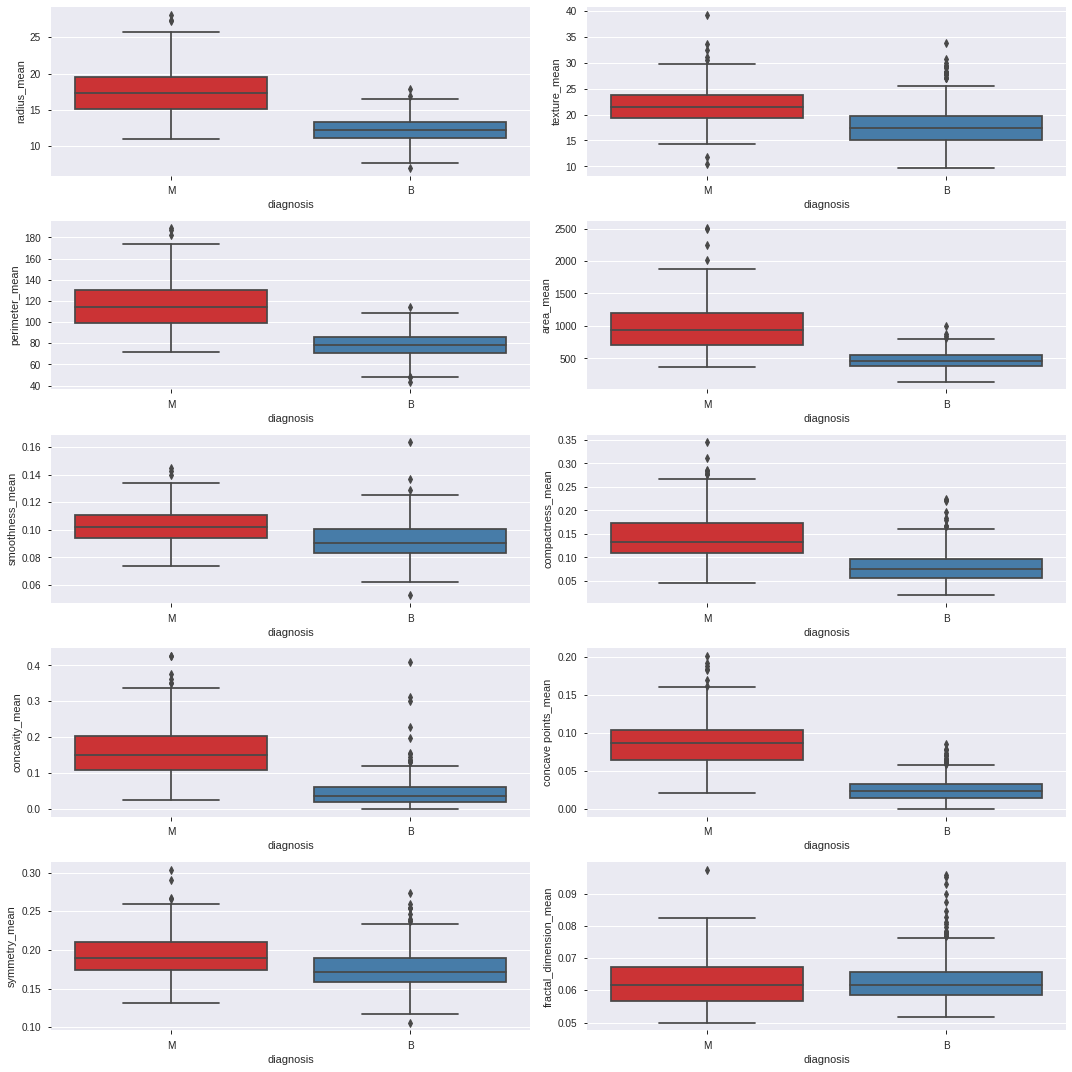

In [24]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows=int(len(features_mean)/2)
    plt.subplot(rows,2,i+1)
    
    sns.boxplot(x='diagnosis',y=feature,data=data,palette='Set1')
    
plt.tight_layout()
plt.show()
    

In [25]:
#machine learning
feature_selection=['radius_mean','perimeter_mean','area_mean','concavity_mean','concave_point_mean']

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
import time

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
data['diagnosis']=le.fit_transform(data['diagnosis'])

In [31]:
x=data.loc[:,features_mean]
y=data['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [32]:
x.isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [42]:
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
accuracy_all=[]
cvs_all=[]

In [44]:
x_trine.isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [45]:
y_trine.isna().sum()

0

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model=LogisticRegression(solver='liblinear')

In [48]:
model.fit(x_trine,y_trine)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
trine_score=model.score(x_trine,y_trine)
trine_score

0.9054945054945055

In [50]:
test_score=model.score(x_test,y_test)
test_score

0.9385964912280702

In [51]:
new_predicton=model.predict(x_test)

In [52]:
new_predicton

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [53]:
pd.DataFrame({'Actual':y_test,'new_predicton':new_predicton})

,Actual,new_predicton
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
...,...,...
486,0,0
75,1,1
249,0,0
238,0,1


In [54]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [55]:
confusion_matrix(y_test,new_predicton)

array([[68,  3],
       [ 4, 39]])

In [56]:
print(classification_report(y_test,new_predicton))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [57]:
accuracy_score(y_test,new_predicton)

0.9385964912280702

In [58]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [60]:
cv=cross_val_score(model,x_trine,y_trine,cv=20)
cv

array([0.95652174, 0.91304348, 0.91304348, 0.86956522, 0.91304348,
       0.82608696, 0.86956522, 0.91304348, 0.91304348, 1.        ,
       0.91304348, 0.91304348, 0.95652174, 0.7826087 , 0.95652174,
       0.86363636, 0.86363636, 0.86363636, 0.95454545, 0.81818182])

In [61]:
cv_p=cross_val_predict(model,x_trine,y_trine)
cv_p

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [62]:
results=pd.DataFrame({'Target':y_trine,'new_Target':cv_p})

In [63]:
results.head(2)

,Target,new_Target
68,0,0
181,1,1


In [64]:
x_trine.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
68,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,0.08046
181,21.090,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398


In [66]:
model.predict([[9.029,17.33,58.79,250.5,0.1066,0.1413 ,0.3130 ,0.04375 ,0.2111 ,0.08046]])

array([0])

In [67]:
model.predict([[9.029,17.33,58.79,250.5,0.1066,0.2832 ,0.2487 ,0.14960 ,0.2395 ,0.07398]])

array([0])